In [ ]:
import pandas as pd
import numpy as np

df2=pd.read_excel('/content/drive/MyDrive/maszynowe16.xlsx', index_col=False)
df2=df2[df2['kapitalizacja'] != 0]
df2=df2[df2['okres'] != 'AKT']
df2['wzrost_proc'] = np.where(df2['symbol'].shift(-1) == df2['symbol'], (df2['kapitalizacja'].shift(-1)-df2['kapitalizacja'])/df2['kapitalizacja'].shift(-1), 9999)
df2=df2[df2['wzrost_proc'] != 9999]
df2['wzrost2'] = np.where(df2['wzrost_proc'] > 0.05,1,0)
df2['wzrost3'] = np.where(df2['wzrost_proc'] < -0.10,1,0)
df2['wzrost'] = np.where(df2['wzrost_proc'] > 0.19,1,0)
print(df2.columns)


Index(['Unnamed: 0', 'symbol', 'okres', 'Płynność bieżąca',
       'Płynność bieżącaproc', 'Płynność bieżącaprocROK',
       'Płynność bieżącaprocROK2', 'Płynność podwyższona',
       'Płynność podwyższonaproc', 'Płynność podwyższonaprocROK',
       'Płynność podwyższonaprocROK2', 'Zadłużenie ogólne',
       'Zadłużenie ogólneproc', 'Zadłużenie ogólneprocROK',
       'Zadłużenie ogólneprocROK2',
       'Udział zysku netto w przepływach operacyjnych',
       'Udział zysku netto w przepływach operacyjnychproc',
       'Udział zysku netto w przepływach operacyjnychprocROK',
       'Udział zysku netto w przepływach operacyjnychprocROK2', 'ROE',
       'ROEproc', 'ROEprocROK', 'ROEprocROK2', 'ROA', 'ROAproc', 'ROAprocROK',
       'ROAprocROK2', 'Wartość księgowa na akcję',
       'Wartość księgowa na akcjęproc', 'Wartość księgowa na akcjęprocROK',
       'Wartość księgowa na akcjęprocROK2',
       'Wartość księgowa Grahama na akcję',
       'Wartość księgowa Grahama na akcjęproc',
       'W

<ipython-input-8-bddc950020ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wzrost2'] = np.where(df2['wzrost_proc'] > 0.05,1,0)
<ipython-input-8-bddc950020ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wzrost3'] = np.where(df2['wzrost_proc'] < -0.10,1,0)
<ipython-input-8-bddc950020ef>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
df2['wzrost'] = np.where(df2['wzrost_proc'] > 0.19,1,0)
df=df2.drop(columns=['okres','symbol','Unnamed: 0','kapitalizacja','wzrost2','wzrost3','wzrost_proc'])
for col in df.columns:

  #print(x[col].value_counts())
  df=pd.get_dummies(df, columns=[col],drop_first=True)
print(df.shape)

df2['wzrost'] = np.where(df2['wzrost_proc'] < -0.19,1,0)

df4=df2.drop(columns=['okres','symbol','Unnamed: 0','kapitalizacja','wzrost2','wzrost3','wzrost_proc'])
for col in df4.columns:

  #print(x[col].value_counts())
  df4=pd.get_dummies(df4, columns=[col],drop_first=True)
print(df4.shape)


# x= df.drop(columns=['wzrost_1'])
# x=x.loc[~(x==0).all(axis=1)]
#print(x)



<ipython-input-9-accd9a74e652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['wzrost'] = np.where(df2['wzrost_proc'] > 0.19,1,0)


(35401, 414)
(35401, 414)


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

y= df4['wzrost_1']
x= df4.drop(columns=['wzrost_1'])
x=x.loc[~(x==0).all(axis=1)]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.5,stratify=y,random_state=1)
x_valid, x_test, y_valid, y_test= train_test_split(x_test,y_test,test_size=0.4,stratify=y_test,random_state=1)

ModelCheck = ModelCheckpoint(filepath='/content/drive/MyDrive/moj_najlepszy_model_WK_spadek_29_03_2025.keras',
                             monitor='val_loss',
                             save_best_only=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint


model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(1024, activation='relu',input_shape=[x_train.shape[1]]))
model.add(Dropout(0.9))
x=1
while x < 1:
  model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
  model.add(Dropout(0.3))
  x=x+1
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

EarlyStop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          patience=10,
                          verbose=1)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │         424,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,985 (1.63 MB)

 Trainable params: 425,985 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train,y_train, validation_data=(x_valid,y_valid),epochs=300,batch_size = 256,callbacks = [EarlyStop,ModelCheck])

Epoch 1/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.7942 - loss: 0.5095 - val_accuracy: 0.8339 - val_loss: 0.4142
Epoch 2/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8381 - loss: 0.4174 - val_accuracy: 0.8357 - val_loss: 0.4065
Epoch 3/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8395 - loss: 0.4046 - val_accuracy: 0.8372 - val_loss: 0.4037
Epoch 4/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8403 - loss: 0.3981 - val_accuracy: 0.8367 - val_loss: 0.4040
Epoch 5/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8414 - loss: 0.3969 - val_accuracy: 0.8373 - val_loss: 0.4015
Epoch 6/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8477 - loss: 0.3793 - val_accuracy: 0.8385 - val_loss: 0.4019
Epoch 7/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8483 - loss: 0.3734 - val_accuracy: 0.8372 - val_loss: 0.4010
Epoch 8/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8538 - loss: 0.3710 - val_accuracy: 0.8384 - 

In [ ]:
model.evaluate(x_test,y_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8367 - loss: 0.4075


[0.41148558259010315, 0.8385066390037537]

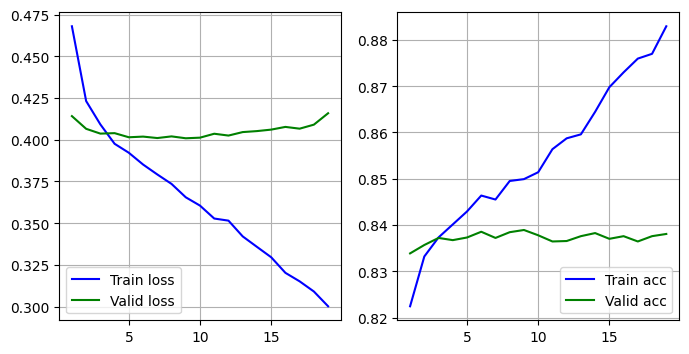

In [ ]:
import matplotlib.pyplot as plt

def plot_train_valid_history(history):
    """
    Plots train and validation losses.
    Arguments: history - history of training (result of keras model.fit).
        history.history must be a dictionary that looks as follow:
        {
            'loss' : .....
            'valid_loss' : .....
            'accuracy' : .... # Optional
            'val_accuracy' : ..... # Optional
        }
    """
    epochs = np.arange(len(history.history['val_loss'])) + 1
    fig = plt.figure(figsize=(8, 4))
    if 'accuracy' in history.history:
        ax1 = fig.add_subplot(121)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)

        ax1 = fig.add_subplot(122)
        ax1.plot(epochs, history.history['accuracy'], c='b', label='Train acc')
        ax1.plot(epochs, history.history['val_accuracy'], c='g', label='Valid acc')
        plt.legend(loc='lower right');
        plt.grid(True)


    else:
        ax1 = fig.add_subplot(111)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)
    plt.show()


plot_train_valid_history(history)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
y= df['wzrost_1']
x= df.drop(columns=['wzrost_1'])
x=x.loc[~(x==0).all(axis=1)]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.5,stratify=y,random_state=1)
x_valid, x_test, y_valid, y_test= train_test_split(x_test,y_test,test_size=0.4,stratify=y_test,random_state=1)

ModelCheck = ModelCheckpoint(filepath='/content/drive/MyDrive/moj_najlepszy_model_wzrost_WK_29_03_2025.keras',
                             monitor='val_accuracy',
                             save_best_only=True)


neurony=[512,1024,2048]
for nn in neurony:
  dropp=0.1
  while dropp < 0.91:
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(nn, activation='relu',input_shape=[x_train.shape[1]]))
    model.add(Dropout(dropp))
    x=1
    while x < 1:
      model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
      model.add(Dropout(0.3))
      x=x+1
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    EarlyStop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          patience=6,
                          verbose=1)

    model.summary()

    history=model.fit(x_train,y_train, validation_data=(x_valid,y_valid),epochs=300,batch_size = 256,callbacks = [EarlyStop,ModelCheck])

    dropp=dropp+0.1



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8185 - loss: 0.4671 - val_accuracy: 0.8364 - val_loss: 0.4048
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8391 - loss: 0.3891 - val_accuracy: 0.8396 - val_loss: 0.4010
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8519 - loss: 0.3660 - val_accuracy: 0.8373 - val_loss: 0.4017
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8556 - loss: 0.3466 - val_accuracy: 0.8374 - val_loss: 0.4028
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8725 - loss: 0.3082 - val_accuracy: 0.8370 - val_loss: 0.4055
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8876 - loss: 0.2796 - val_accuracy: 0.8353 - val_loss: 0.4198
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9030 - loss: 0.2374 - val_accuracy: 0.8336 - val_loss: 0.4239
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9288 - loss: 0.1891 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8202 - loss: 0.4593 - val_accuracy: 0.8375 - val_loss: 0.4030
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8471 - loss: 0.3790 - val_accuracy: 0.8369 - val_loss: 0.4012
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8512 - loss: 0.3584 - val_accuracy: 0.8377 - val_loss: 0.4031
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8586 - loss: 0.3383 - val_accuracy: 0.8369 - val_loss: 0.4024
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8724 - loss: 0.3082 - val_accuracy: 0.8351 - val_loss: 0.4044
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8882 - loss: 0.2756 - val_accuracy: 0.8326 - val_loss: 0.4125
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9091 - loss: 0.2402 - val_accuracy: 0.8346 - val_loss: 0.4193
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9236 - loss: 0.2075 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7970 - loss: 0.4827 - val_accuracy: 0.8369 - val_loss: 0.4071
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8440 - loss: 0.3868 - val_accuracy: 0.8383 - val_loss: 0.4009
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8462 - loss: 0.3708 - val_accuracy: 0.8390 - val_loss: 0.4021
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8524 - loss: 0.3493 - val_accuracy: 0.8384 - val_loss: 0.4002
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8667 - loss: 0.3291 - val_accuracy: 0.8368 - val_loss: 0.4048
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8762 - loss: 0.2984 - val_accuracy: 0.8356 - val_loss: 0.4084
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8960 - loss: 0.2657 - val_accuracy: 0.8304 - val_loss: 0.4122
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9117 - loss: 0.2323 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8093 - loss: 0.4719 - val_accuracy: 0.8366 - val_loss: 0.4043
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8404 - loss: 0.3943 - val_accuracy: 0.8388 - val_loss: 0.4007
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8464 - loss: 0.3737 - val_accuracy: 0.8383 - val_loss: 0.4040
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8532 - loss: 0.3572 - val_accuracy: 0.8391 - val_loss: 0.4024
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8629 - loss: 0.3293 - val_accuracy: 0.8384 - val_loss: 0.4033
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8761 - loss: 0.3021 - val_accuracy: 0.8345 - val_loss: 0.4067
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8900 - loss: 0.2759 - val_accuracy: 0.8358 - val_loss: 0.4095
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9021 - loss: 0.2472 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8017 - loss: 0.4808 - val_accuracy: 0.8363 - val_loss: 0.4044
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8390 - loss: 0.3921 - val_accuracy: 0.8382 - val_loss: 0.4008
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8516 - loss: 0.3650 - val_accuracy: 0.8374 - val_loss: 0.4017
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8543 - loss: 0.3568 - val_accuracy: 0.8364 - val_loss: 0.4019
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8556 - loss: 0.3450 - val_accuracy: 0.8381 - val_loss: 0.4027
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8705 - loss: 0.3166 - val_accuracy: 0.8320 - val_loss: 0.4072
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8812 - loss: 0.2951 - val_accuracy: 0.8358 - val_loss: 0.4106
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8908 - loss: 0.2687 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7859 - loss: 0.4968 - val_accuracy: 0.8363 - val_loss: 0.4071
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8418 - loss: 0.3966 - val_accuracy: 0.8391 - val_loss: 0.4007
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8453 - loss: 0.3824 - val_accuracy: 0.8392 - val_loss: 0.3998
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8495 - loss: 0.3675 - val_accuracy: 0.8388 - val_loss: 0.4009
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8563 - loss: 0.3547 - val_accuracy: 0.8396 - val_loss: 0.4024
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8610 - loss: 0.3404 - val_accuracy: 0.8376 - val_loss: 0.4017
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8703 - loss: 0.3189 - val_accuracy: 0.8369 - val_loss: 0.4044
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8815 - loss: 0.3015 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7955 - loss: 0.4901 - val_accuracy: 0.8360 - val_loss: 0.4068
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8366 - loss: 0.4089 - val_accuracy: 0.8363 - val_loss: 0.4026
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8399 - loss: 0.3890 - val_accuracy: 0.8379 - val_loss: 0.4000
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8474 - loss: 0.3774 - val_accuracy: 0.8381 - val_loss: 0.3991
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8507 - loss: 0.3632 - val_accuracy: 0.8383 - val_loss: 0.4004
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8607 - loss: 0.3417 - val_accuracy: 0.8370 - val_loss: 0.4001
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8630 - loss: 0.3390 - val_accuracy: 0.8373 - val_loss: 0.4022
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8702 - loss: 0.3221 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8015 - loss: 0.4922 - val_accuracy: 0.8364 - val_loss: 0.4113
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8350 - loss: 0.4155 - val_accuracy: 0.8374 - val_loss: 0.4027
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8424 - loss: 0.3906 - val_accuracy: 0.8398 - val_loss: 0.3996
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8450 - loss: 0.3822 - val_accuracy: 0.8395 - val_loss: 0.3992
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8474 - loss: 0.3783 - val_accuracy: 0.8393 - val_loss: 0.3986
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8484 - loss: 0.3706 - val_accuracy: 0.8388 - val_loss: 0.3981
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8474 - loss: 0.3680 - val_accuracy: 0.8384 - val_loss: 0.3995
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8530 - loss: 0.3550 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7940 - loss: 0.5176 - val_accuracy: 0.8341 - val_loss: 0.4148
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8350 - loss: 0.4319 - val_accuracy: 0.8351 - val_loss: 0.4072
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8378 - loss: 0.4200 - val_accuracy: 0.8357 - val_loss: 0.4031
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8433 - loss: 0.3977 - val_accuracy: 0.8371 - val_loss: 0.4013
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8415 - loss: 0.4066 - val_accuracy: 0.8384 - val_loss: 0.3997
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8423 - loss: 0.4026 - val_accuracy: 0.8385 - val_loss: 0.3992
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8390 - loss: 0.3940 - val_accuracy: 0.8390 - val_loss: 0.3987
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8434 - loss: 0.3912 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8307 - loss: 0.4478 - val_accuracy: 0.8380 - val_loss: 0.4015
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8447 - loss: 0.3736 - val_accuracy: 0.8396 - val_loss: 0.4034
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8564 - loss: 0.3459 - val_accuracy: 0.8397 - val_loss: 0.4052
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8777 - loss: 0.3011 - val_accuracy: 0.8336 - val_loss: 0.4065
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8946 - loss: 0.2626 - val_accuracy: 0.8358 - val_loss: 0.4175
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9265 - loss: 0.2075 - val_accuracy: 0.8213 - val_loss: 0.4330
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9560 - loss: 0.1545 - val_accuracy: 0.8307 - val_loss: 0.4577
Epoch 7: early stopping


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8099 - loss: 0.4691 - val_accuracy: 0.8389 - val_loss: 0.4009
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8462 - loss: 0.3805 - val_accuracy: 0.8397 - val_loss: 0.4038
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8546 - loss: 0.3497 - val_accuracy: 0.8382 - val_loss: 0.4027
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8681 - loss: 0.3177 - val_accuracy: 0.8367 - val_loss: 0.4063
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8857 - loss: 0.2790 - val_accuracy: 0.8343 - val_loss: 0.4096
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9163 - loss: 0.2242 - val_accuracy: 0.8302 - val_loss: 0.4267
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9458 - loss: 0.1705 - val_accuracy: 0.8266 - val_loss: 0.4427
Epoch 7: early stopping


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8173 - loss: 0.4658 - val_accuracy: 0.8379 - val_loss: 0.4022
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8415 - loss: 0.3841 - val_accuracy: 0.8389 - val_loss: 0.4015
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8503 - loss: 0.3597 - val_accuracy: 0.8367 - val_loss: 0.4008
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8621 - loss: 0.3289 - val_accuracy: 0.8341 - val_loss: 0.4055
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8898 - loss: 0.2832 - val_accuracy: 0.8305 - val_loss: 0.4119
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9034 - loss: 0.2465 - val_accuracy: 0.8243 - val_loss: 0.4238
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9311 - loss: 0.1947 - val_accuracy: 0.8370 - val_loss: 0.4474
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9530 - loss: 0.1497 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8117 - loss: 0.4663 - val_accuracy: 0.8372 - val_loss: 0.4017
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8441 - loss: 0.3793 - val_accuracy: 0.8388 - val_loss: 0.4008
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8543 - loss: 0.3571 - val_accuracy: 0.8388 - val_loss: 0.4012
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8631 - loss: 0.3319 - val_accuracy: 0.8385 - val_loss: 0.4095
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8802 - loss: 0.3005 - val_accuracy: 0.8298 - val_loss: 0.4105
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8952 - loss: 0.2595 - val_accuracy: 0.8353 - val_loss: 0.4220
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9182 - loss: 0.2190 - val_accuracy: 0.8338 - val_loss: 0.4317
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9409 - loss: 0.1753 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8107 - loss: 0.4691 - val_accuracy: 0.8368 - val_loss: 0.4012
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8415 - loss: 0.3810 - val_accuracy: 0.8379 - val_loss: 0.4000
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8482 - loss: 0.3623 - val_accuracy: 0.8390 - val_loss: 0.4005
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8586 - loss: 0.3392 - val_accuracy: 0.8363 - val_loss: 0.4002
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8743 - loss: 0.3150 - val_accuracy: 0.8345 - val_loss: 0.4050
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8891 - loss: 0.2754 - val_accuracy: 0.8355 - val_loss: 0.4150
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9065 - loss: 0.2374 - val_accuracy: 0.8346 - val_loss: 0.4197
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9196 - loss: 0.2062 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8064 - loss: 0.4769 - val_accuracy: 0.8366 - val_loss: 0.4036
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8417 - loss: 0.3904 - val_accuracy: 0.8403 - val_loss: 0.3991
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8493 - loss: 0.3692 - val_accuracy: 0.8353 - val_loss: 0.4000
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8579 - loss: 0.3515 - val_accuracy: 0.8383 - val_loss: 0.4017
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8610 - loss: 0.3320 - val_accuracy: 0.8382 - val_loss: 0.4067
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8764 - loss: 0.3056 - val_accuracy: 0.8347 - val_loss: 0.4082
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8901 - loss: 0.2712 - val_accuracy: 0.8293 - val_loss: 0.4149
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9043 - loss: 0.2394 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7929 - loss: 0.4927 - val_accuracy: 0.8362 - val_loss: 0.4040
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8465 - loss: 0.3847 - val_accuracy: 0.8384 - val_loss: 0.4009
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8434 - loss: 0.3840 - val_accuracy: 0.8385 - val_loss: 0.4014
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8534 - loss: 0.3592 - val_accuracy: 0.8342 - val_loss: 0.4022
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8562 - loss: 0.3523 - val_accuracy: 0.8389 - val_loss: 0.4049
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8666 - loss: 0.3268 - val_accuracy: 0.8382 - val_loss: 0.4044
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8737 - loss: 0.3009 - val_accuracy: 0.8363 - val_loss: 0.4072
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8854 - loss: 0.2842 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8047 - loss: 0.4858 - val_accuracy: 0.8365 - val_loss: 0.4036
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8332 - loss: 0.4042 - val_accuracy: 0.8378 - val_loss: 0.4008
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8430 - loss: 0.3873 - val_accuracy: 0.8395 - val_loss: 0.3985
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8445 - loss: 0.3765 - val_accuracy: 0.8395 - val_loss: 0.3989
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8507 - loss: 0.3585 - val_accuracy: 0.8399 - val_loss: 0.4008
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8520 - loss: 0.3530 - val_accuracy: 0.8402 - val_loss: 0.4050
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8609 - loss: 0.3309 - val_accuracy: 0.8390 - val_loss: 0.4009
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8721 - loss: 0.3178 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7931 - loss: 0.5119 - val_accuracy: 0.8352 - val_loss: 0.4089
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8352 - loss: 0.4181 - val_accuracy: 0.8366 - val_loss: 0.4021
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8410 - loss: 0.4000 - val_accuracy: 0.8371 - val_loss: 0.4000
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8388 - loss: 0.3999 - val_accuracy: 0.8378 - val_loss: 0.4001
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8457 - loss: 0.3881 - val_accuracy: 0.8392 - val_loss: 0.3986
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8384 - loss: 0.3929 - val_accuracy: 0.8384 - val_loss: 0.3985
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8459 - loss: 0.3754 - val_accuracy: 0.8393 - val_loss: 0.3993
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8528 - loss: 0.3658 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8314 - loss: 0.4556 - val_accuracy: 0.8385 - val_loss: 0.4007
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8483 - loss: 0.3707 - val_accuracy: 0.8369 - val_loss: 0.4018
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8612 - loss: 0.3334 - val_accuracy: 0.8366 - val_loss: 0.4068
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8824 - loss: 0.2837 - val_accuracy: 0.8363 - val_loss: 0.4252
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9212 - loss: 0.2043 - val_accuracy: 0.8317 - val_loss: 0.4386
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1367 - val_accuracy: 0.8281 - val_loss: 0.4831
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9864 - loss: 0.0838 - val_accuracy: 0.8221 - val_loss: 0.4977
Epoch 7: early stopping


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8006 - loss: 0.4585 - val_accuracy: 0.8387 - val_loss: 0.4021
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8471 - loss: 0.3687 - val_accuracy: 0.8373 - val_loss: 0.4001
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8585 - loss: 0.3460 - val_accuracy: 0.8370 - val_loss: 0.4050
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.8820 - loss: 0.2899 - val_accuracy: 0.8329 - val_loss: 0.4095
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9203 - loss: 0.2191 - val_accuracy: 0.8309 - val_loss: 0.4319
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9558 - loss: 0.1497 - val_accuracy: 0.8277 - val_loss: 0.4581
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9810 - loss: 0.0955 - val_accuracy: 0.8291 - val_loss: 0.4948
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9942 - loss: 0.0607 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8012 - loss: 0.4650 - val_accuracy: 0.8393 - val_loss: 0.4005
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8471 - loss: 0.3702 - val_accuracy: 0.8370 - val_loss: 0.3998
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8565 - loss: 0.3473 - val_accuracy: 0.8379 - val_loss: 0.4050
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8780 - loss: 0.2987 - val_accuracy: 0.8340 - val_loss: 0.4125
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9014 - loss: 0.2437 - val_accuracy: 0.8335 - val_loss: 0.4280
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9428 - loss: 0.1730 - val_accuracy: 0.8234 - val_loss: 0.4474
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9717 - loss: 0.1168 - val_accuracy: 0.8163 - val_loss: 0.4705
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9874 - loss: 0.0804 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8113 - loss: 0.4643 - val_accuracy: 0.8403 - val_loss: 0.4007
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8474 - loss: 0.3688 - val_accuracy: 0.8402 - val_loss: 0.4009
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8573 - loss: 0.3417 - val_accuracy: 0.8386 - val_loss: 0.4060
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8710 - loss: 0.3091 - val_accuracy: 0.8355 - val_loss: 0.4107
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8947 - loss: 0.2544 - val_accuracy: 0.8375 - val_loss: 0.4219
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9248 - loss: 0.2010 - val_accuracy: 0.8289 - val_loss: 0.4421
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9581 - loss: 0.1449 - val_accuracy: 0.8294 - val_loss: 0.4655
Epoch 7: early stopping


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8170 - loss: 0.4543 - val_accuracy: 0.8395 - val_loss: 0.3998
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8466 - loss: 0.3746 - val_accuracy: 0.8382 - val_loss: 0.3990
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.8536 - loss: 0.3548 - val_accuracy: 0.8372 - val_loss: 0.4020
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8677 - loss: 0.3186 - val_accuracy: 0.8358 - val_loss: 0.4081
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8899 - loss: 0.2719 - val_accuracy: 0.8337 - val_loss: 0.4215
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9168 - loss: 0.2179 - val_accuracy: 0.8292 - val_loss: 0.4294
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9424 - loss: 0.1717 - val_accuracy: 0.8331 - val_loss: 0.4596
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9656 - loss: 0.1244 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.8188 - loss: 0.4578 - val_accuracy: 0.8368 - val_loss: 0.4028
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8458 - loss: 0.3789 - val_accuracy: 0.8386 - val_loss: 0.4039
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8472 - loss: 0.3651 - val_accuracy: 0.8362 - val_loss: 0.4014
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8646 - loss: 0.3303 - val_accuracy: 0.8342 - val_loss: 0.4045
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8757 - loss: 0.3008 - val_accuracy: 0.8371 - val_loss: 0.4182
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8977 - loss: 0.2540 - val_accuracy: 0.8343 - val_loss: 0.4269
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9217 - loss: 0.2127 - val_accuracy: 0.8331 - val_loss: 0.4406
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9422 - loss: 0.1652 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8183 - loss: 0.4653 - val_accuracy: 0.8378 - val_loss: 0.4028
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8471 - loss: 0.3805 - val_accuracy: 0.8381 - val_loss: 0.4013
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8502 - loss: 0.3624 - val_accuracy: 0.8391 - val_loss: 0.4012
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8567 - loss: 0.3460 - val_accuracy: 0.8347 - val_loss: 0.4053
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.8707 - loss: 0.3170 - val_accuracy: 0.8351 - val_loss: 0.4043
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8799 - loss: 0.2909 - val_accuracy: 0.8320 - val_loss: 0.4110
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9022 - loss: 0.2499 - val_accuracy: 0.8311 - val_loss: 0.4186
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9120 - loss: 0.2307 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8157 - loss: 0.4759 - val_accuracy: 0.8375 - val_loss: 0.4007
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8466 - loss: 0.3856 - val_accuracy: 0.8390 - val_loss: 0.3995
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8463 - loss: 0.3797 - val_accuracy: 0.8385 - val_loss: 0.3988
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8475 - loss: 0.3684 - val_accuracy: 0.8382 - val_loss: 0.4006
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8570 - loss: 0.3439 - val_accuracy: 0.8367 - val_loss: 0.4016
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8659 - loss: 0.3275 - val_accuracy: 0.8336 - val_loss: 0.4052
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8757 - loss: 0.3070 - val_accuracy: 0.8369 - val_loss: 0.4101
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.8809 - loss: 0.2903 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8085 - loss: 0.4913 - val_accuracy: 0.8362 - val_loss: 0.4041
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8376 - loss: 0.4056 - val_accuracy: 0.8369 - val_loss: 0.4010
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8408 - loss: 0.3968 - val_accuracy: 0.8389 - val_loss: 0.3988
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8425 - loss: 0.3866 - val_accuracy: 0.8391 - val_loss: 0.3986
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8458 - loss: 0.3760 - val_accuracy: 0.8402 - val_loss: 0.3988
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8511 - loss: 0.3701 - val_accuracy: 0.8396 - val_loss: 0.4032
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8539 - loss: 0.3607 - val_accuracy: 0.8394 - val_loss: 0.3988
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8557 - loss: 0.3526 - val_accuracy: 0.

In [ ]:
#!pip install --upgrade jax jaxlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
print(df4)
y= df4['wzrost_1']
x= df4.drop(columns=['wzrost_1'])
x=x.loc[~(x==0).all(axis=1)]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.5,stratify=y,random_state=1)
x_valid, x_test, y_valid, y_test= train_test_split(x_test,y_test,test_size=0.4,stratify=y_test,random_state=1)

ModelCheck = ModelCheckpoint(filepath='/content/drive/MyDrive/moj_najlepszy_model_WK_spadek_29_03_2025.keras',
                             monitor='val_loss',
                             save_best_only=True)


neurony=[512,1024,2048]
for nn in neurony:
  dropp=0.1
  while dropp < 0.91:
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(nn, activation='relu',input_shape=[x_train.shape[1]]))
    model.add(Dropout(dropp))
    x=1
    while x < 1:
      model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
      model.add(Dropout(0.3))
      x=x+1
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    EarlyStop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          patience=16,
                          verbose=1)

    model.summary()

    history=model.fit(x_train,y_train, validation_data=(x_valid,y_valid),epochs=300,batch_size = 256,callbacks = [EarlyStop,ModelCheck])

    dropp=dropp+0.1

       Płynność bieżąca_(0.57, 0.96]  Płynność bieżąca_(0.96, 1.18]  \
2                              False                          False   
3                              False                          False   
4                              False                          False   
5                              False                          False   
6                              False                          False   
...                              ...                            ...   
36920                          False                          False   
36921                          False                          False   
36922                          False                          False   
36923                          False                          False   
36924                          False                          False   

       Płynność bieżąca_(1.18, 1.38]  Płynność bieżąca_(1.38, 1.62]  \
2                              False                          False   
3    

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7432 - loss: 0.5433 - val_accuracy: 0.7846 - val_loss: 0.4846
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7953 - loss: 0.4576 - val_accuracy: 0.7848 - val_loss: 0.4809
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8020 - loss: 0.4393 - val_accuracy: 0.7840 - val_loss: 0.4818
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8153 - loss: 0.4132 - val_accuracy: 0.7836 - val_loss: 0.4825
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8318 - loss: 0.3799 - val_accuracy: 0.7795 - val_loss: 0.4877
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8540 - loss: 0.3412 - val_accuracy: 0.7796 - val_loss: 0.4942
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8823 - loss: 0.2967 - val_accuracy: 0.7761 - val_loss: 0.5007
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9199 - loss: 0.2414 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7595 - loss: 0.5226 - val_accuracy: 0.7848 - val_loss: 0.4831
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7902 - loss: 0.4579 - val_accuracy: 0.7833 - val_loss: 0.4812
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8074 - loss: 0.4346 - val_accuracy: 0.7838 - val_loss: 0.4819
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8184 - loss: 0.4103 - val_accuracy: 0.7814 - val_loss: 0.4843
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8276 - loss: 0.3821 - val_accuracy: 0.7808 - val_loss: 0.4872
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8483 - loss: 0.3483 - val_accuracy: 0.7778 - val_loss: 0.4981
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8794 - loss: 0.3008 - val_accuracy: 0.7765 - val_loss: 0.5042
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9034 - loss: 0.2611 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7520 - loss: 0.5341 - val_accuracy: 0.7845 - val_loss: 0.4837
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7960 - loss: 0.4588 - val_accuracy: 0.7847 - val_loss: 0.4823
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7979 - loss: 0.4450 - val_accuracy: 0.7836 - val_loss: 0.4875
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8128 - loss: 0.4186 - val_accuracy: 0.7802 - val_loss: 0.4836
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8268 - loss: 0.3913 - val_accuracy: 0.7791 - val_loss: 0.4866
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8443 - loss: 0.3567 - val_accuracy: 0.7816 - val_loss: 0.4912
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8599 - loss: 0.3236 - val_accuracy: 0.7746 - val_loss: 0.4980
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8894 - loss: 0.2818 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7452 - loss: 0.5346 - val_accuracy: 0.7863 - val_loss: 0.4842
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7927 - loss: 0.4632 - val_accuracy: 0.7844 - val_loss: 0.4853
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7983 - loss: 0.4488 - val_accuracy: 0.7847 - val_loss: 0.4825
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8139 - loss: 0.4224 - val_accuracy: 0.7862 - val_loss: 0.4844
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8235 - loss: 0.3994 - val_accuracy: 0.7844 - val_loss: 0.4864
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8347 - loss: 0.3730 - val_accuracy: 0.7804 - val_loss: 0.4908
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8552 - loss: 0.3415 - val_accuracy: 0.7815 - val_loss: 0.4957
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8835 - loss: 0.3003 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7655 - loss: 0.5273 - val_accuracy: 0.7823 - val_loss: 0.4835
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7962 - loss: 0.4616 - val_accuracy: 0.7845 - val_loss: 0.4814
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8033 - loss: 0.4463 - val_accuracy: 0.7854 - val_loss: 0.4824
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8079 - loss: 0.4295 - val_accuracy: 0.7849 - val_loss: 0.4832
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8160 - loss: 0.4076 - val_accuracy: 0.7816 - val_loss: 0.4843
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8274 - loss: 0.3896 - val_accuracy: 0.7830 - val_loss: 0.4868
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8441 - loss: 0.3601 - val_accuracy: 0.7792 - val_loss: 0.4918
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8624 - loss: 0.3369 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7538 - loss: 0.5317 - val_accuracy: 0.7838 - val_loss: 0.4856
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7896 - loss: 0.4674 - val_accuracy: 0.7843 - val_loss: 0.4812
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8002 - loss: 0.4506 - val_accuracy: 0.7833 - val_loss: 0.4818
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7989 - loss: 0.4435 - val_accuracy: 0.7847 - val_loss: 0.4863
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8122 - loss: 0.4214 - val_accuracy: 0.7833 - val_loss: 0.4834
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8222 - loss: 0.3996 - val_accuracy: 0.7816 - val_loss: 0.4846
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8308 - loss: 0.3861 - val_accuracy: 0.7790 - val_loss: 0.4882
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8441 - loss: 0.3595 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7523 - loss: 0.5449 - val_accuracy: 0.7817 - val_loss: 0.4860
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7931 - loss: 0.4668 - val_accuracy: 0.7834 - val_loss: 0.4827
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7911 - loss: 0.4637 - val_accuracy: 0.7854 - val_loss: 0.4810
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8040 - loss: 0.4419 - val_accuracy: 0.7838 - val_loss: 0.4815
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8007 - loss: 0.4421 - val_accuracy: 0.7846 - val_loss: 0.4825
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8105 - loss: 0.4254 - val_accuracy: 0.7830 - val_loss: 0.4833
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8229 - loss: 0.4092 - val_accuracy: 0.7838 - val_loss: 0.4858
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8251 - loss: 0.3914 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7566 - loss: 0.5481 - val_accuracy: 0.7814 - val_loss: 0.4859
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7883 - loss: 0.4829 - val_accuracy: 0.7838 - val_loss: 0.4824
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7895 - loss: 0.4714 - val_accuracy: 0.7858 - val_loss: 0.4805
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7978 - loss: 0.4557 - val_accuracy: 0.7857 - val_loss: 0.4800
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7991 - loss: 0.4529 - val_accuracy: 0.7859 - val_loss: 0.4805
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8014 - loss: 0.4442 - val_accuracy: 0.7857 - val_loss: 0.4812
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8008 - loss: 0.4398 - val_accuracy: 0.7847 - val_loss: 0.4820
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8131 - loss: 0.4261 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                     │ (None, 512)                 │         211,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,481 (830.00 KB)

 Trainable params: 212,481 (830.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7395 - loss: 0.5801 - val_accuracy: 0.7811 - val_loss: 0.4918
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7776 - loss: 0.5035 - val_accuracy: 0.7811 - val_loss: 0.4858
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7777 - loss: 0.4944 - val_accuracy: 0.7834 - val_loss: 0.4832
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7831 - loss: 0.4862 - val_accuracy: 0.7832 - val_loss: 0.4822
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7908 - loss: 0.4749 - val_accuracy: 0.7846 - val_loss: 0.4808
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7959 - loss: 0.4686 - val_accuracy: 0.7841 - val_loss: 0.4808
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7966 - loss: 0.4598 - val_accuracy: 0.7846 - val_loss: 0.4808
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7997 - loss: 0.4553 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7678 - loss: 0.5281 - val_accuracy: 0.7849 - val_loss: 0.4815
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7912 - loss: 0.4602 - val_accuracy: 0.7850 - val_loss: 0.4803
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8116 - loss: 0.4209 - val_accuracy: 0.7782 - val_loss: 0.4853
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8331 - loss: 0.3773 - val_accuracy: 0.7828 - val_loss: 0.4894
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8637 - loss: 0.3190 - val_accuracy: 0.7732 - val_loss: 0.4945
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9061 - loss: 0.2556 - val_accuracy: 0.7767 - val_loss: 0.5167
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9458 - loss: 0.1908 - val_accuracy: 0.7637 - val_loss: 0.5366
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9759 - loss: 0.1360 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7515 - loss: 0.5327 - val_accuracy: 0.7836 - val_loss: 0.4886
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7950 - loss: 0.4561 - val_accuracy: 0.7846 - val_loss: 0.4820
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8104 - loss: 0.4281 - val_accuracy: 0.7831 - val_loss: 0.4842
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8300 - loss: 0.3876 - val_accuracy: 0.7790 - val_loss: 0.4890
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8530 - loss: 0.3431 - val_accuracy: 0.7707 - val_loss: 0.4977
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8955 - loss: 0.2836 - val_accuracy: 0.7803 - val_loss: 0.5170
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9283 - loss: 0.2203 - val_accuracy: 0.7771 - val_loss: 0.5378
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9608 - loss: 0.1667 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7464 - loss: 0.5334 - val_accuracy: 0.7862 - val_loss: 0.4813
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7940 - loss: 0.4544 - val_accuracy: 0.7848 - val_loss: 0.4798
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8095 - loss: 0.4283 - val_accuracy: 0.7838 - val_loss: 0.4809
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8233 - loss: 0.3986 - val_accuracy: 0.7788 - val_loss: 0.4885
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8449 - loss: 0.3536 - val_accuracy: 0.7828 - val_loss: 0.4938
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8764 - loss: 0.3021 - val_accuracy: 0.7789 - val_loss: 0.5064
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9131 - loss: 0.2413 - val_accuracy: 0.7737 - val_loss: 0.5194
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9444 - loss: 0.1898 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7646 - loss: 0.5174 - val_accuracy: 0.7854 - val_loss: 0.4826
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7894 - loss: 0.4595 - val_accuracy: 0.7838 - val_loss: 0.4820
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8055 - loss: 0.4340 - val_accuracy: 0.7810 - val_loss: 0.4836
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8154 - loss: 0.4090 - val_accuracy: 0.7849 - val_loss: 0.4894
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8399 - loss: 0.3622 - val_accuracy: 0.7818 - val_loss: 0.4932
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8643 - loss: 0.3216 - val_accuracy: 0.7702 - val_loss: 0.5039
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8953 - loss: 0.2730 - val_accuracy: 0.7767 - val_loss: 0.5150
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9221 - loss: 0.2207 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7513 - loss: 0.5359 - val_accuracy: 0.7828 - val_loss: 0.4841
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7936 - loss: 0.4596 - val_accuracy: 0.7803 - val_loss: 0.4833
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8028 - loss: 0.4354 - val_accuracy: 0.7859 - val_loss: 0.4830
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8164 - loss: 0.4148 - val_accuracy: 0.7805 - val_loss: 0.4836
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8322 - loss: 0.3752 - val_accuracy: 0.7819 - val_loss: 0.4880
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8498 - loss: 0.3483 - val_accuracy: 0.7730 - val_loss: 0.4984
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8776 - loss: 0.3046 - val_accuracy: 0.7796 - val_loss: 0.5062
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9009 - loss: 0.2588 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7577 - loss: 0.5247 - val_accuracy: 0.7837 - val_loss: 0.4826
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7908 - loss: 0.4621 - val_accuracy: 0.7836 - val_loss: 0.4845
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8022 - loss: 0.4374 - val_accuracy: 0.7820 - val_loss: 0.4835
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8139 - loss: 0.4186 - val_accuracy: 0.7831 - val_loss: 0.4845
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8267 - loss: 0.3939 - val_accuracy: 0.7778 - val_loss: 0.4860
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8407 - loss: 0.3679 - val_accuracy: 0.7795 - val_loss: 0.4888
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8601 - loss: 0.3339 - val_accuracy: 0.7744 - val_loss: 0.4970
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8808 - loss: 0.2969 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7588 - loss: 0.5283 - val_accuracy: 0.7847 - val_loss: 0.4822
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7941 - loss: 0.4628 - val_accuracy: 0.7849 - val_loss: 0.4816
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7971 - loss: 0.4504 - val_accuracy: 0.7836 - val_loss: 0.4829
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8052 - loss: 0.4307 - val_accuracy: 0.7841 - val_loss: 0.4827
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8106 - loss: 0.4153 - val_accuracy: 0.7856 - val_loss: 0.4835
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8221 - loss: 0.4006 - val_accuracy: 0.7831 - val_loss: 0.4867
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8354 - loss: 0.3801 - val_accuracy: 0.7831 - val_loss: 0.4918
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8505 - loss: 0.3485 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7517 - loss: 0.5472 - val_accuracy: 0.7831 - val_loss: 0.4840
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7853 - loss: 0.4802 - val_accuracy: 0.7846 - val_loss: 0.4809
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7942 - loss: 0.4613 - val_accuracy: 0.7834 - val_loss: 0.4802
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7996 - loss: 0.4439 - val_accuracy: 0.7832 - val_loss: 0.4802
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8111 - loss: 0.4334 - val_accuracy: 0.7856 - val_loss: 0.4818
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8140 - loss: 0.4209 - val_accuracy: 0.7855 - val_loss: 0.4819
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8150 - loss: 0.4154 - val_accuracy: 0.7864 - val_loss: 0.4848
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8305 - loss: 0.3909 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                     │ (None, 1024)                │         423,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,961 (1.62 MB)

 Trainable params: 424,961 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7417 - loss: 0.5700 - val_accuracy: 0.7815 - val_loss: 0.4876
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7825 - loss: 0.4926 - val_accuracy: 0.7832 - val_loss: 0.4837
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7854 - loss: 0.4767 - val_accuracy: 0.7847 - val_loss: 0.4821
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7932 - loss: 0.4694 - val_accuracy: 0.7844 - val_loss: 0.4804
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7908 - loss: 0.4662 - val_accuracy: 0.7830 - val_loss: 0.4803
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7978 - loss: 0.4593 - val_accuracy: 0.7833 - val_loss: 0.4797
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7957 - loss: 0.4554 - val_accuracy: 0.7831 - val_loss: 0.4807
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7987 - loss: 0.4490 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7411 - loss: 0.5420 - val_accuracy: 0.7820 - val_loss: 0.4845
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8008 - loss: 0.4499 - val_accuracy: 0.7840 - val_loss: 0.4857
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8168 - loss: 0.4090 - val_accuracy: 0.7771 - val_loss: 0.4882
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8449 - loss: 0.3586 - val_accuracy: 0.7809 - val_loss: 0.5016
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8974 - loss: 0.2689 - val_accuracy: 0.7664 - val_loss: 0.5144
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9451 - loss: 0.1905 - val_accuracy: 0.7687 - val_loss: 0.5478
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9807 - loss: 0.1174 - val_accuracy: 0.7722 - val_loss: 0.5880
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9951 - loss: 0.0697 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7619 - loss: 0.5293 - val_accuracy: 0.7840 - val_loss: 0.4869
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7972 - loss: 0.4489 - val_accuracy: 0.7839 - val_loss: 0.4831
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8136 - loss: 0.4124 - val_accuracy: 0.7808 - val_loss: 0.4889
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8421 - loss: 0.3631 - val_accuracy: 0.7738 - val_loss: 0.4985
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.8932 - loss: 0.2806 - val_accuracy: 0.7761 - val_loss: 0.5181
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9451 - loss: 0.1967 - val_accuracy: 0.7781 - val_loss: 0.5772
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9742 - loss: 0.1293 - val_accuracy: 0.7761 - val_loss: 0.6081
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9873 - loss: 0.0887 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7646 - loss: 0.5144 - val_accuracy: 0.7827 - val_loss: 0.4836
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.7942 - loss: 0.4483 - val_accuracy: 0.7852 - val_loss: 0.4813
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8193 - loss: 0.4047 - val_accuracy: 0.7852 - val_loss: 0.4890
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8418 - loss: 0.3585 - val_accuracy: 0.7823 - val_loss: 0.5354
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8764 - loss: 0.2962 - val_accuracy: 0.7669 - val_loss: 0.5169
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9305 - loss: 0.2176 - val_accuracy: 0.7734 - val_loss: 0.5399
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9612 - loss: 0.1533 - val_accuracy: 0.7637 - val_loss: 0.5675
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9829 - loss: 0.1087 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7522 - loss: 0.5263 - val_accuracy: 0.7849 - val_loss: 0.4831
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7969 - loss: 0.4507 - val_accuracy: 0.7824 - val_loss: 0.4821
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.8131 - loss: 0.4192 - val_accuracy: 0.7841 - val_loss: 0.4934
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8314 - loss: 0.3777 - val_accuracy: 0.7812 - val_loss: 0.4943
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8700 - loss: 0.3160 - val_accuracy: 0.7814 - val_loss: 0.5331
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9003 - loss: 0.2538 - val_accuracy: 0.7635 - val_loss: 0.5262
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9447 - loss: 0.1863 - val_accuracy: 0.7692 - val_loss: 0.5512
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9700 - loss: 0.1359 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                     │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.7731 - loss: 0.5179 - val_accuracy: 0.7847 - val_loss: 0.4838
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7934 - loss: 0.4566 - val_accuracy: 0.7847 - val_loss: 0.4817
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8123 - loss: 0.4232 - val_accuracy: 0.7861 - val_loss: 0.4844
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8267 - loss: 0.3949 - val_accuracy: 0.7844 - val_loss: 0.4955
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8460 - loss: 0.3480 - val_accuracy: 0.7820 - val_loss: 0.5071
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8821 - loss: 0.2898 - val_accuracy: 0.7665 - val_loss: 0.5147
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9221 - loss: 0.2242 - val_accuracy: 0.7726 - val_loss: 0.5328
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9463 - loss: 0.1804 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)                    │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7532 - loss: 0.5309 - val_accuracy: 0.7858 - val_loss: 0.4822
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.7937 - loss: 0.4555 - val_accuracy: 0.7802 - val_loss: 0.4845
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8005 - loss: 0.4361 - val_accuracy: 0.7818 - val_loss: 0.4829
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8203 - loss: 0.4006 - val_accuracy: 0.7832 - val_loss: 0.4842
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8390 - loss: 0.3641 - val_accuracy: 0.7804 - val_loss: 0.4940
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8655 - loss: 0.3202 - val_accuracy: 0.7788 - val_loss: 0.5092
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8972 - loss: 0.2703 - val_accuracy: 0.7748 - val_loss: 0.5199
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9219 - loss: 0.2286 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)                    │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7529 - loss: 0.5288 - val_accuracy: 0.7847 - val_loss: 0.4820
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7912 - loss: 0.4655 - val_accuracy: 0.7847 - val_loss: 0.4828
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8044 - loss: 0.4386 - val_accuracy: 0.7845 - val_loss: 0.4844
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8108 - loss: 0.4202 - val_accuracy: 0.7834 - val_loss: 0.4857
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8220 - loss: 0.3934 - val_accuracy: 0.7782 - val_loss: 0.4908
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8457 - loss: 0.3515 - val_accuracy: 0.7800 - val_loss: 0.4933
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8642 - loss: 0.3226 - val_accuracy: 0.7849 - val_loss: 0.5091
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8889 - loss: 0.2771 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)                    │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7596 - loss: 0.5379 - val_accuracy: 0.7846 - val_loss: 0.4824
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7899 - loss: 0.4683 - val_accuracy: 0.7805 - val_loss: 0.4841
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7987 - loss: 0.4528 - val_accuracy: 0.7826 - val_loss: 0.4822
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8085 - loss: 0.4316 - val_accuracy: 0.7831 - val_loss: 0.4831
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8120 - loss: 0.4168 - val_accuracy: 0.7844 - val_loss: 0.4839
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8218 - loss: 0.4011 - val_accuracy: 0.7797 - val_loss: 0.4871
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8336 - loss: 0.3776 - val_accuracy: 0.7805 - val_loss: 0.4868
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8539 - loss: 0.3501 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_106 (Dense)                    │ (None, 2048)                │         847,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 849,921 (3.24 MB)

 Trainable params: 849,921 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7481 - loss: 0.5570 - val_accuracy: 0.7831 - val_loss: 0.4848
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.7879 - loss: 0.4782 - val_accuracy: 0.7826 - val_loss: 0.4847
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7829 - loss: 0.4784 - val_accuracy: 0.7845 - val_loss: 0.4818
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7977 - loss: 0.4600 - val_accuracy: 0.7850 - val_loss: 0.4818
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7980 - loss: 0.4515 - val_accuracy: 0.7848 - val_loss: 0.4810
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7998 - loss: 0.4482 - val_accuracy: 0.7849 - val_loss: 0.4810
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8023 - loss: 0.4461 - val_accuracy: 0.7846 - val_loss: 0.4836
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8112 - loss: 0.4290 - val_accuracy: 0.